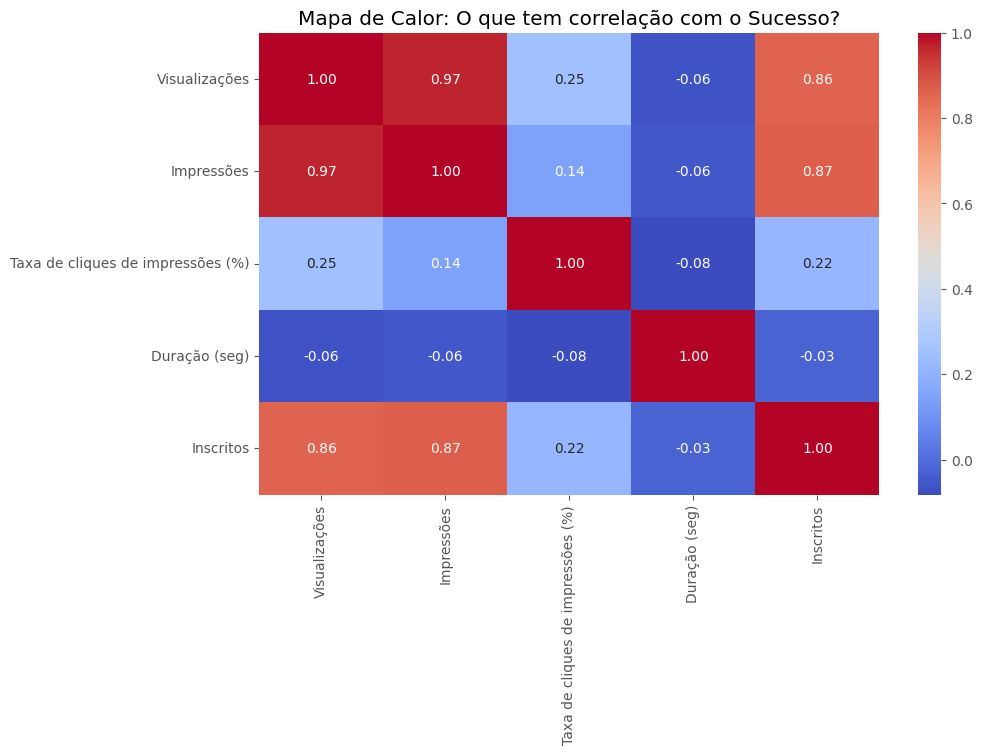

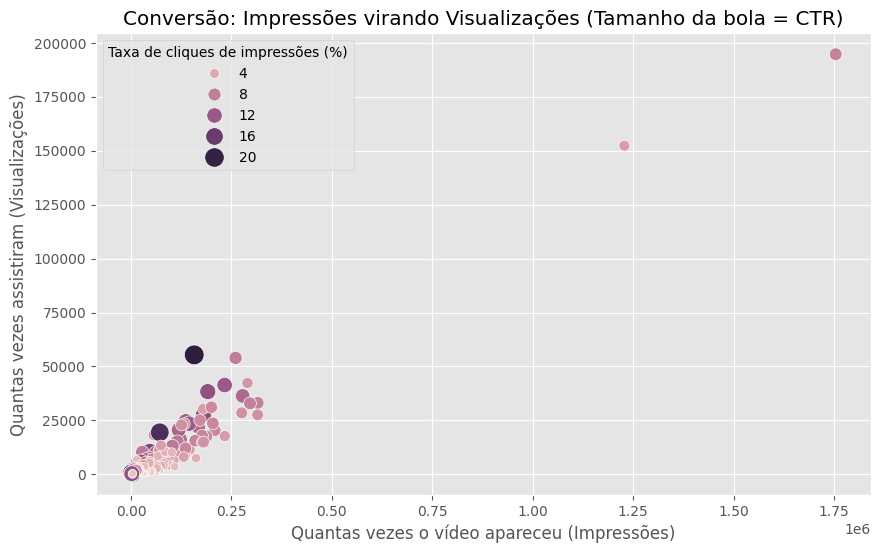

Resumo dos Dados:


,Visualizações,Taxa de cliques de impressões (%),Duração (seg)
count,499.000000,499.000000,499.000000
mean,4221.883768,5.062204,1016.939880
std,12945.392104,3.079921,1644.192433
min,21.000000,0.500000,8.000000
25%,409.000000,2.855000,442.500000
50%,978.000000,4.180000,596.000000
75%,2894.500000,6.735000,833.500000
max,194752.000000,20.580000,14509.000000


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Estatisticas_canal_Dados_da_tabela.csv')

df = df[df['Conteúdo'] != 'Total'].copy()

cols_to_fix = ['Taxa de cliques de impressões (%)', 'Tempo de exibição (horas)']
for col in cols_to_fix:
    df[col] = df[col].astype(str).str.replace(',', '.').apply(pd.to_numeric, errors='coerce')

df['Duração (seg)'] = pd.to_numeric(df['Duração'], errors='coerce')

plt.style.use('ggplot') # Estilo bonito para os gráficos

plt.figure(figsize=(10, 6))
correlation_cols = ['Visualizações', 'Impressões', 'Taxa de cliques de impressões (%)', 'Duração (seg)', 'Inscritos']
sns.heatmap(df[correlation_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor: O que tem correlação com o Sucesso?')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Impressões', y='Visualizações', hue='Taxa de cliques de impressões (%)', size='Taxa de cliques de impressões (%)', sizes=(20, 200))
plt.title('Conversão: Impressões virando Visualizações (Tamanho da bola = CTR)')
plt.xlabel('Quantas vezes o vídeo apareceu (Impressões)')
plt.ylabel('Quantas vezes assistiram (Visualizações)')
plt.show()

print("Resumo dos Dados:")
display(df[['Visualizações', 'Taxa de cliques de impressões (%)', 'Duração (seg)']].describe())
